In [6]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
data = pd.read_csv("All_Anime.csv")
data.head()

,Unnamed: 0,Name_of_Anime,Story,Year,Duration,Certificate,Genre,Rating
0,0,Attack on Titan,After his hometown is destroyed and his mother...,2013-2023,24 min,TV-MA,"Animation, Action, Adventure",0.0
1,1,"Bastard!! Heavy Metal, Dark Fantasy",When evil forces threaten to resurrect Anthras...,2022,25 min,TV-MA,"Animation, Action, Adventure",6.8
2,2,One Piece,Follows the adventures of Monkey D. Luffy and ...,1999,24 min,TV-14,"Animation, Action, Adventure",8.8
3,3,Spy x Family,A spy on an undercover mission gets married an...,2022,NaN,TV-14,"Animation, Action, Comedy",8.7
4,4,Demon Slayer: Kimetsu no Yaiba,A family is attacked by demons and only two me...,2019,24 min,TV-MA,"Animation, Action, Adventure",8.7


In [8]:
# analyse the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6069 non-null   int64  
 1   Name_of_Anime  6069 non-null   object 
 2   Story          6069 non-null   object 
 3   Year           6017 non-null   object 
 4   Duration       4148 non-null   object 
 5   Certificate    2753 non-null   object 
 6   Genre          6045 non-null   object 
 7   Rating         4736 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 379.4+ KB


In [9]:
rows, columns = data.shape
print("number of rows = ",rows)
print("number of columns = ",columns)


number of rows =  6069
number of columns =  8


In [10]:
print("Ratings Summary:")
print(data['Rating'].describe(), '\n')

Ratings Summary:
count    4736.000000
mean        6.143011
std         2.283667
min         0.000000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.400000
Name: Rating, dtype: float64 



In [11]:
#Handle time series data
def year_processing(year):
    try:
        if isinstance(year, str):
            if '-' in year:  # Handle ranges like "2013-2023"
                start_year, end_year = year.split('-')
                return (int(start_year) + int(end_year)) // 2
            elif year.isdigit():  # Handle single years like "2000"
                return int(year)
        return np.nan  # Return NaN for invalid or missing values
    except:
        return np.nan  # Catch any errors and return NaN

data['Year'] = data['Year'].apply(year_processing)

# Handle the "Duration" column
def duration_processing(duration):
    try:
        if isinstance(duration, str) and 'min' in duration:
            return int(duration.split()[0])  # Extract the number before "min"
        return np.nan  # Return NaN for invalid or missing values
    except:
        return np.nan  # Catch any errors and return NaN

data['Duration'] = data['Duration'].apply(duration_processing)

# Display the processed data
print(data[['Year', 'Duration']].head())

     Year  Duration
0  2018.0      24.0
1  2022.0      25.0
2  1999.0      24.0
3  2022.0       NaN
4  2019.0      24.0


In [12]:
# check for missing values and handle them
# Drop the 'Unnamed: 0'
data.drop(data.columns[0], axis=1, inplace = True)

# Fill missing 'Year' with the most frequent value (mode)
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])

# Fill missing 'Duration' with the most frequent values
data['Duration'] = data['Duration'].fillna(data['Duration'].mode()[0])


# Fill missing 'Certificate' with the mode
data['Certificate'] = data['Certificate'].fillna(data['Certificate'].mode()[0])

# Fill missing 'Genre' with the mode
data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])

# Fill missing 'Rating' with the median rating
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

# Verify that there are no missing values left
print(data.isnull().sum())

Name_of_Anime    0
Story            0
Year             0
Duration         0
Certificate      0
Genre            0
Rating           0
dtype: int64


In [13]:
# use word2vec for "story" column
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

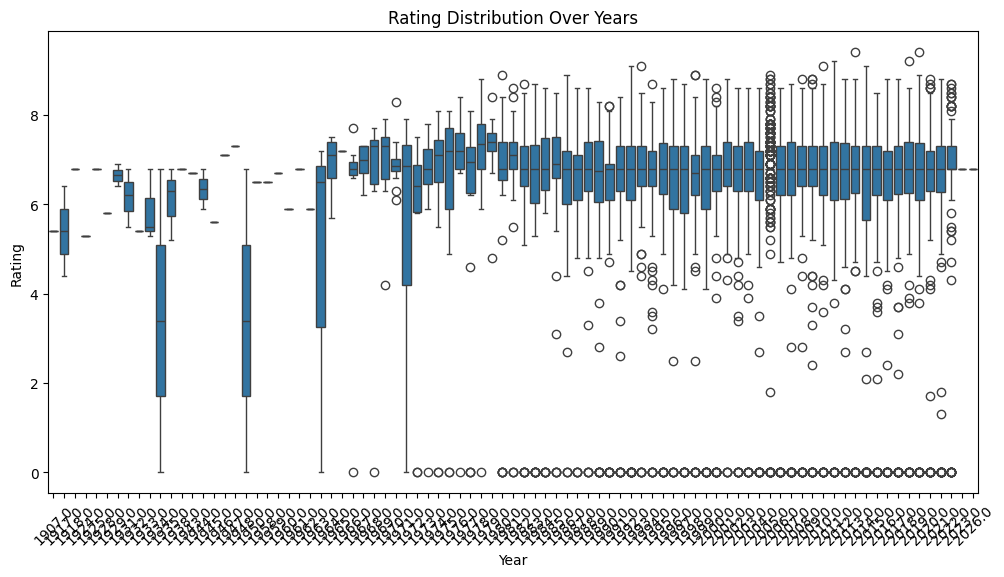

In [14]:
# Visualise the rating pattern over the years using boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Rating', data=data)
plt.xticks(rotation=45)
plt.title('Rating Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [16]:
data['Duration'] = data['Duration'].astype(str).apply(
    lambda x: int(''.join(filter(str.isdigit, x))) if isinstance(x, str) and any(c.isdigit() for c in x) else np.nan
)
data = data.dropna(subset=['Duration'])
data['Duration'] = data['Duration'].astype(int)


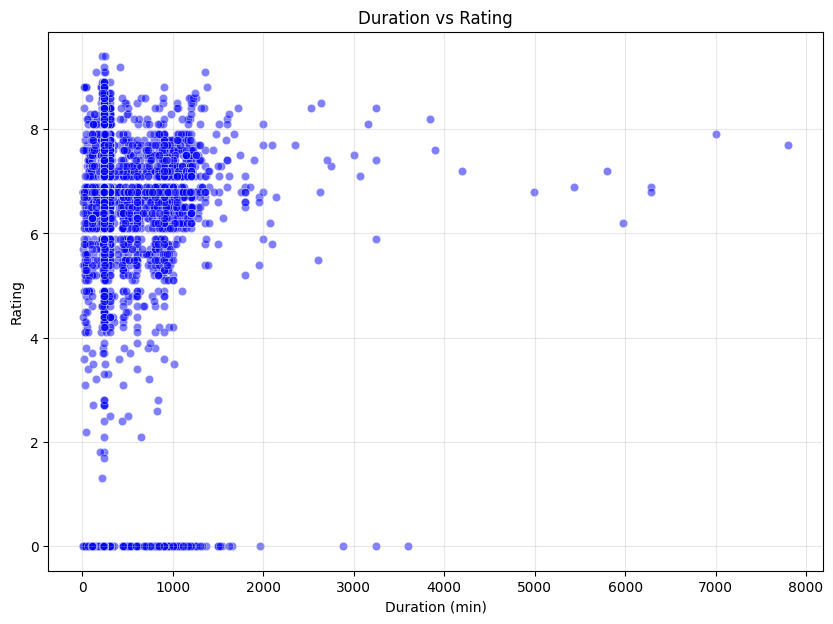

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing the 'Duration' column by extracting numbers (in case there are some invalid entries like NaNs)
data['Duration'] = data['Duration'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notna(x) else np.nan)

# Drop rows with NaN values in 'Duration' or 'Rating' columns (optional)
data = data.dropna(subset=['Duration', 'Rating'])

# Plotting the relationship between 'Duration' and 'Rating'
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Duration', y='Rating', color='blue', alpha=0.5)
plt.title("Duration vs Rating", fontsize=12)
plt.xlabel("Duration (min)", fontsize=10)
plt.ylabel("Rating", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


Except for a few outliers having extremely large Duration values, the rest of the data shows that animes having shorter duration times tend to have greater ratings.

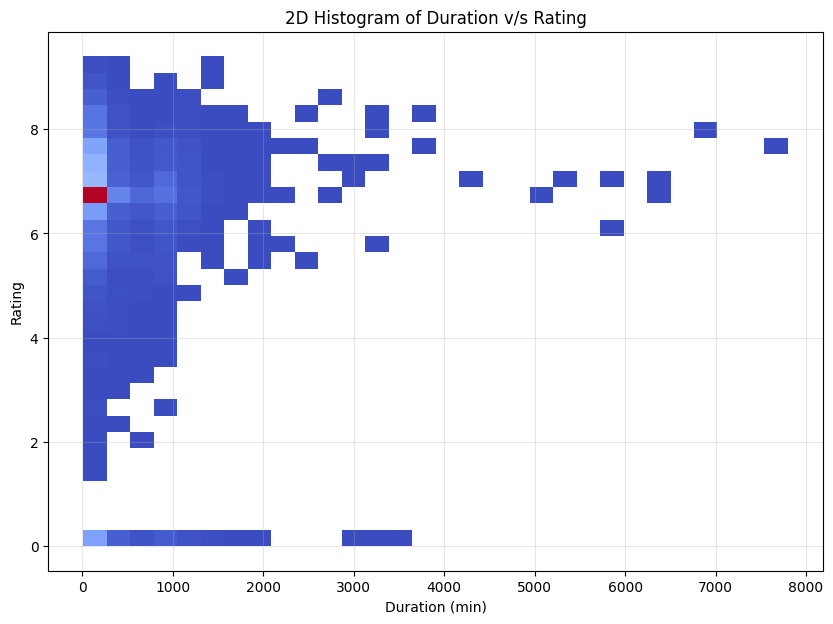

In [18]:
# Dealing with the dense nature of scatter plot (Issue - #57)
plt.figure(figsize=(10, 7))
sns.histplot(data=data, x='Duration', y='Rating', bins = (30, 30), pmax=0.9, cmap='coolwarm')
plt.title("2D Histogram of Duration v/s Rating", fontsize = 12)
plt.xlabel("Duration (min)", fontsize=10)
plt.ylabel("Rating", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

This histogram clearly shows that Animes have a dense concentration of points in the duration range 0-200 min. It also suggests that Animes having duration times in this range tend to have higher ratings. We can also notice the existence of outliers having a very low Duration(~ 1 min) with an abnormally high rating (6-7), denoted by a red dot.

In [19]:
# Standardise numerical values and handle categorical columns (get dummies for the genre)
from sklearn.preprocessing import LabelEncoder

# Encode the "Certificate" column using label encoding
label_encoder = LabelEncoder()
data['Certificate'] = label_encoder.fit_transform(data['Certificate'])

# Encode the "Genre" column using one-hot encoding
data = pd.concat([data, data['Genre'].str.get_dummies(sep=', ')], axis=1)

# Display the transformed columns
print(data['Certificate'].head())

#deleting the genre column
data.drop('Genre', axis=1, inplace = True)
print(data.head())

0    15
1    15
2    13
3    13
4    15
Name: Certificate, dtype: int64
                         Name_of_Anime  \
0                      Attack on Titan   
1  Bastard!! Heavy Metal, Dark Fantasy   
2                            One Piece   
3                         Spy x Family   
4       Demon Slayer: Kimetsu no Yaiba   

                                               Story    Year  Duration  \
0  After his hometown is destroyed and his mother...  2018.0       240   
1  When evil forces threaten to resurrect Anthras...  2022.0       250   
2  Follows the adventures of Monkey D. Luffy and ...  1999.0       240   
3  A spy on an undercover mission gets married an...  2022.0       240   
4  A family is attacked by demons and only two me...  2019.0       240   

   Certificate  Rating  Action  Adventure  Animation  Biography  ...  Mystery  \
0           15     0.0       1          1          1          0  ...        0   
1           15     6.8       1          1          1          0  ...

In [21]:
# Check the columns to ensure only numeric values are in the feature set
print(data.dtypes)


Name_of_Anime     object
Story             object
Year             float64
Duration           int64
Certificate        int64
Rating           float64
Action             int64
Adventure          int64
Animation          int64
Biography          int64
Comedy             int64
Crime              int64
Documentary        int64
Drama              int64
Family             int64
Fantasy            int64
Game-Show          int64
History            int64
Horror             int64
Music              int64
Musical            int64
Mystery            int64
News               int64
Romance            int64
Sci-Fi             int64
Short              int64
Sport              int64
Talk-Show          int64
Thriller           int64
War                int64
Western            int64
dtype: object


In [22]:
# Implementing Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# To select only numeric columns
X = data.select_dtypes(include=[np.number]).drop(columns=['Rating'])  # Drop 'Rating'
y = data["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [23]:
# Implementing Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Selecting only numeric columns (excluding 'Rating')
X_rf = data.select_dtypes(include=[np.number]).drop(columns=['Rating'])  # Drop 'Rating'
y_rf = data["Rating"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)

In [24]:
#evaluate the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression Model
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Evaluate Random Forest Model
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Print the metrics for both models
print("Linear Regression Metrics:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R² Score: {r2_lr}\n")

print("Random Forest Metrics:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")


Linear Regression Metrics:
MAE: 1.1853438340580567
MSE: 3.810811899656986
R² Score: -0.0025955807448363455

Random Forest Metrics:
MAE: 1.3612466650160484
MSE: 4.639738323269249
R² Score: -0.22067980819019617


In [28]:
r2_lin = r2_score(y_test, y_pred)
mae_lin = mean_absolute_error(y_test, y_pred)
mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse_lin)
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Linear Regression Model:")
print(f"R²: {r2_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")
print(f"MSE: {mse_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")

print("\nRandom Forest Regressor Model:")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


Linear Regression Model:
R²: -0.0026
MAE: 1.1853
MSE: 3.8108
RMSE: 1.9521

Random Forest Regressor Model:
R²: -0.2207
MAE: 1.3612
MSE: 4.6397
RMSE: 2.1540


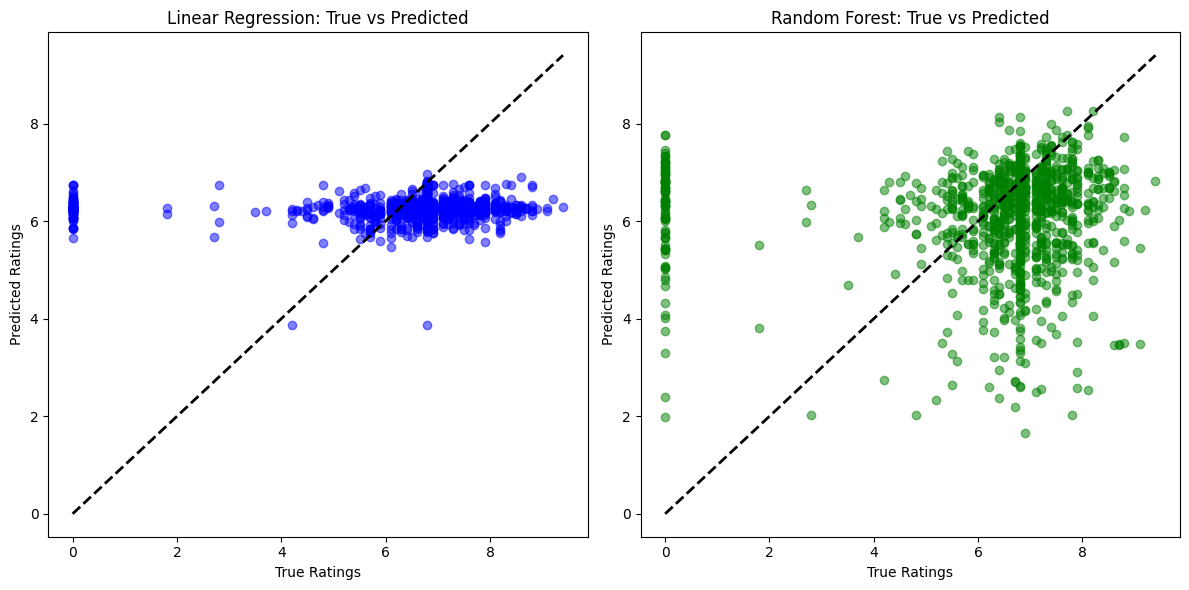

In [27]:
import matplotlib.pyplot as plt

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: True vs Predicted")

# Plotting for Random Forest Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test_rf, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=2)
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Random Forest: True vs Predicted")

plt.tight_layout()
plt.show()


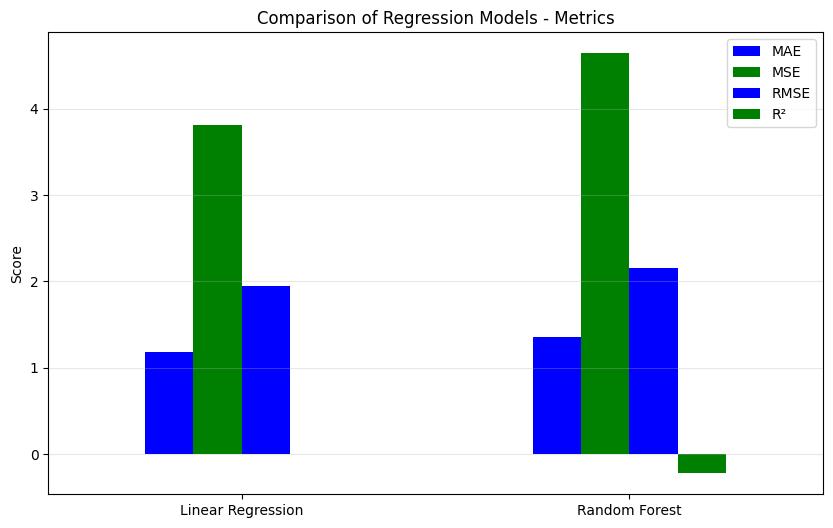

In [29]:
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
metrics = {
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
}
metrics_df = pd.DataFrame(metrics, index=['Linear Regression', 'Random Forest'])
metrics_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title("Comparison of Regression Models - Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()
